In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

To find the correlation among the features

<AxesSubplot:>

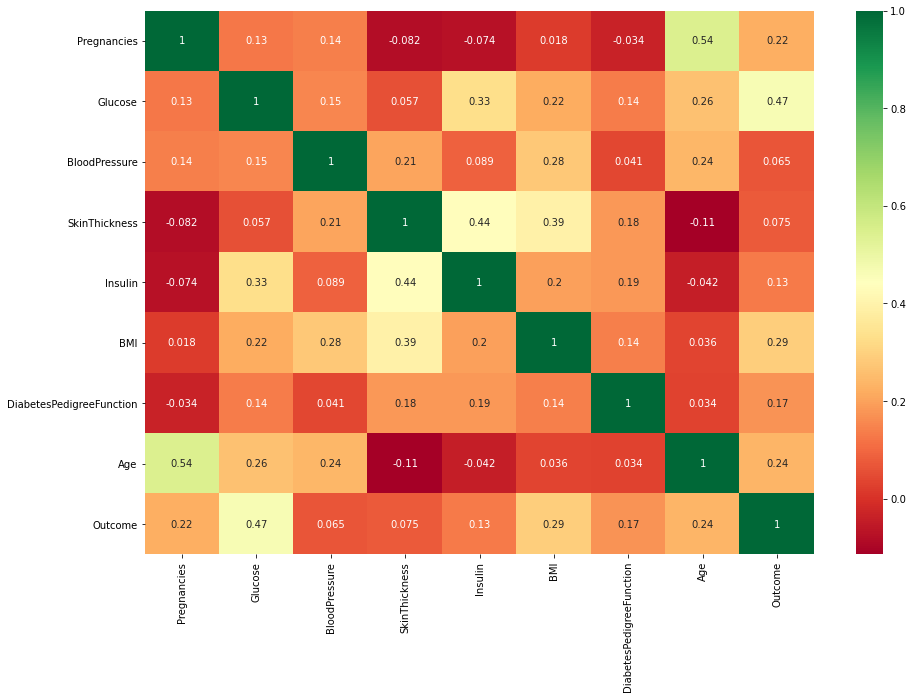

In [8]:
co=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(co,annot=True,cmap='RdYlGn')

To Check Whether the Dependent Features are balanced in the Dataset or not

<AxesSubplot:xlabel='Outcome', ylabel='count'>

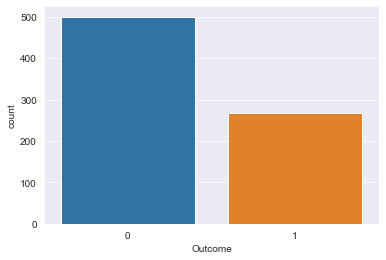

In [9]:
sns.set_style('darkgrid')
sns.countplot(x='Outcome',data=df)

In [10]:
featured_columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predicted_class=['Outcome']

In [11]:
x=df[featured_columns].values
y=df[predicted_class].values

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=56)

To check how many Zeroes are present in the predictor features

In [13]:
print("Number of rows: {}".format(len(df)))
print("Number of rows having zeroes in Pregnancies is: {}".format(len(df.loc[df['Pregnancies']==0])))
print("Number of rows having zeroes in Glucose is: {}".format(len(df.loc[df['Glucose']==0])))
print("Number of rows having zeroes in BloodPressure is: {}".format(len(df.loc[df['BloodPressure']==0])))
print("Number of rows having zeroes in SkinThickness is: {}".format(len(df.loc[df['SkinThickness']==0])))
print("Number of rows having zeroes in Insuli is: {}".format(len(df.loc[df['Insulin']==0])))
print("Number of rows having zeroes in BMI is: {}".format(len(df.loc[df['BMI']==0])))
print("Number of rows having zeroes in DiabetesPedigreeFunction is: {}".format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print("Number of rows having zeroes in Age is: {}".format(len(df.loc[df['Age']==0])))

Number of rows: 768
Number of rows having zeroes in Pregnancies is: 111
Number of rows having zeroes in Glucose is: 5
Number of rows having zeroes in BloodPressure is: 35
Number of rows having zeroes in SkinThickness is: 227
Number of rows having zeroes in Insuli is: 374
Number of rows having zeroes in BMI is: 11
Number of rows having zeroes in DiabetesPedigreeFunction is: 0
Number of rows having zeroes in Age is: 0


To fill the zeroes with the mean value

In [14]:
fill_values=SimpleImputer(missing_values=0, strategy='mean')
x_train=fill_values.fit_transform(x_train)
x_test=fill_values.fit_transform(x_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(x_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [45]:
predict_train_data = random_forest_model.predict(x_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.801


HyperParameter Optimization and using Xgboost Classifier to better accuracy

In [17]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [18]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [24]:
classifier=xgboost.XGBClassifier()

In [25]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,verbose=3)

In [26]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [27]:
from datetime import datetime

In [30]:
start_time=timer(None)
random_search.fit(x,y.ravel())
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 8.15 seconds.


In [32]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [40]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [41]:
score=cross_val_score(classifier,x,y.ravel(),cv=10)

[09:43:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:43:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:43:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:43:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [42]:
score

array([0.68831169, 0.79220779, 0.76623377, 0.67532468, 0.72727273,
       0.79220779, 0.79220779, 0.83116883, 0.73684211, 0.78947368])

In [43]:
score.mean()

0.759125085440875